Nicholas De Santos

DSC 680

Final Project 2 

# Background/History and our Business Problem

    The war on drugs has always been at the forefront of this nation. Aside from the political aspect of this so-called 
    war, one thing remains bipartisan and that is the effects that many drugs can have on people. Legal or illegal drug 
    use has been researched far and wide. We have been told time and time again about the physical repercussions of 
    different drugs. We've been told from an early age that smoking causes lung cancer and to say no to drugs. But how 
    much are we taught when it comes to the mental and possibly emotional effects that drugs can have on the human brain? 
    Can drugs affect your personality? During use yes and it has been proven. Especially when used in addictive behavior
    (Gateway Foundation, 2024).

    As drug use and specific drugs are becoming legal in more and more places, people are constantly having access to 
    different narcotics at record rates. It's important to look at the different effects that these drugs can have on 
    people. While extensive research has been done on how drugs can affect the human body physically, there is a noticeably
    lower amount of research done on exactly how different drugs might affect a person's personality.

    The main problem that I want to explore is whether we can determine what kind of personality attributes (variables
    neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, sensation seeking) 
    based on how often a person uses specific drugs. The goal is to possibly make some kind of model or series of models 
    to build a personality profile for the individual.


# Data Explanation (Data Prep, Data Dictionary, etc)

    The data that we will be using a data set found on Kaggle.com titled "Drug Consumptions (UCI)". 
    The data set contains information and records for 1885 different individuals who chose to respond to a questionnaire. 
    For each respondent, 12 different personality attributes are known (neuroticism, extraversion, openness to experience,
    agreeableness, conscientiousness, impulsivity, sensation seeking,  level of education, age, gender, country of 
    residence, and ethnicity. The participants were also asked to provide information on any past drug use (both legal 
    and illegal drugs are included in the data set). The drugs included are alcohol, amphetamines, amyl nitrite, 
    benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone,
    mushrooms, nicotine and volatile substance abuse, and Semeron. For each drug, each participant listened to how long 
    ago they had used the drug which shines a light on how often an individual is using and what sort of effects you can 
    expect.

    
About the Data and Variables and Drug Codes:

    ID:-------is a number of records in an original database. Cannot be 
    related to the participant.
    Age: ------is the age of participant
    Gender:----Male or Female
    Education:-level of education of participant
    Country:---country of origin of the participant
    Ethnicity:-ethnicity of participant
    Nscore:----is NEO-FFI-R Neuroticism (TARGET)
    Escore:----is NEO-FFI-R Extraversion (TARGET)
    Oscore:----is NEO-FFI-R Openness to experience. (TARGET)
    Ascore:----is NEO-FFI-R Agreeableness. (TARGET)
    Cscore:----is NEO-FFI-R Conscientiousness. (TARGET)
    Impulsive:-is impulsiveness measured by BIS-11 (TARGET)
    SS:--------is sensation seeing measured by ImpSS (TARGET)
    Alcohol:---alcohol consumption
    Amphet:----amphetamines consumption
    Amyl:------nitrite consumption
    Benzos:----benzodiazepine consumption
    Caff:------caffeine consumption
    Cannabis:--marijuana consumption
    Choc:------chocolate consumption
    Coke:------cocaine consumption
    Crack:-----crack cocaine consumption
    Ecstasy:---ecstasy consumption
    Heroin:----heroin consumption
    Ketamine:--ketamine consumption
    Legalh:----legal highs consumption
    LSD:-------LSD consumption
    Meth:------methadone consumption
    Mushrooms:--magic mushroom consumption
    Nicotine:--nicotine consumption
    Semer:-----class of fictitious drug Semeron consumption (i.e. control)
    VSA:-------class of volatile substance abuse consumption

Drug Use Codes:

    CL0:-------Never Used
    CL1:-------Used over a Decade Ago
    CL2:-------Used in Last Decade
    CL3:-------Used in Last Year 59
    CL4:-------Used in Last Month
    CL5:-------Used in Last Week
    CL6:-------Used in Last Day
    
### Importing Data and Main Packages

    Before we can begin to build our model we must first load our data. A view of what the data looks like can be found 
    in the appendix at the end of this report. Our data will be saved into a dataframe object 'drugdata'.

In [1]:
#Importing Data and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drugdata = pd.read_csv('drug.csv')
drugdata = pd.DataFrame(drugdata)

### Examining and Cleaning Data

    Once our data has been loaded and saved in a dataframe, we can start examining the data more closely. Then we can 
    see what we need to do in order to clean and prepare the data for our analysis.
    
    The first thing that we did was get rid of the ID variable. We get rid of this values since we aren't necessarily
    concerned with specific individuaul's observed data. Each instance can also be refered to by their index in the
    dataframe.

In [2]:
drugdata = drugdata.drop(columns=['ID'])

    In this next portion of the code we want to see all the different unique values for each of the categorical
    variables, which would be all of our predicting varaibles. This will help us decide if there are any other varaibles
    that we might want to consider getting rid of before moving onto our model-building process. We can also get an idea
    of all the different types of unique values for each variable as well as the spread in terms of frequency of those
    values.

In [3]:
#Unique Values for Age
print(drugdata['Age'].value_counts())

Age
18-24    643
25-34    481
35-44    355
45-54    294
55-64     93
65+       18
Name: count, dtype: int64


In [4]:
#Unique Values for Gender
print(drugdata['Gender'].value_counts())

Gender
M    943
F    941
Name: count, dtype: int64


In [5]:
#Unique Values for Education
print(drugdata['Education'].value_counts())

Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64


In [6]:
#Unique Values for Country
print(drugdata['Country'].value_counts())

Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64


In [7]:
#Unique Values for Ethnicity
print(drugdata['Ethnicity'].value_counts())

Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64


In [8]:
#Unique Values for Alcohol
print(drugdata['Alcohol'].value_counts())

Alcohol
CL5    758
CL6    505
CL4    287
CL3    198
CL2     68
CL1     34
CL0     34
Name: count, dtype: int64


In [9]:
#Unique Values for amphetamines
print(drugdata['Amphet'].value_counts())

Amphet
CL0    976
CL2    242
CL1    230
CL3    198
CL6    102
CL4     75
CL5     61
Name: count, dtype: int64


In [10]:
#Unique Values for nitrite
print(drugdata['Amyl'].value_counts())

Amyl
CL0    1304
CL2     237
CL1     210
CL3      92
CL4      24
CL5      14
CL6       3
Name: count, dtype: int64


In [11]:
#Unique Values for benzodiazepine
print(drugdata['Benzos'].value_counts())

Benzos
CL0    1000
CL3     236
CL2     233
CL4     120
CL1     116
CL6      95
CL5      84
Name: count, dtype: int64


In [12]:
#Unique Values for Caffeine
print(drugdata['Caff'].value_counts())

Caff
CL6    1384
CL5     273
CL4     106
CL3      60
CL0      27
CL2      24
CL1      10
Name: count, dtype: int64


In [13]:
#Unique Values for Cannabis
print(drugdata['Cannabis'].value_counts())

Cannabis
CL6    463
CL0    412
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: count, dtype: int64


In [14]:
#Unique Values for Chocolate
print(drugdata['Choc'].value_counts())

Choc
CL6    807
CL5    682
CL4    296
CL3     54
CL0     32
CL2     10
CL1      3
Name: count, dtype: int64


In [15]:
#Unique Values for Cocaine
print(drugdata['Coke'].value_counts())

Coke
CL0    1037
CL2     270
CL3     258
CL1     160
CL4      99
CL5      41
CL6      19
Name: count, dtype: int64


In [16]:
#Unique Values for Crack Cocaine
print(drugdata['Crack'].value_counts())

Crack
CL0    1626
CL2     112
CL1      67
CL3      59
CL5       9
CL4       9
CL6       2
Name: count, dtype: int64


In [17]:
#Unique Values for Ecstasy
print(drugdata['Ecstasy'].value_counts())

Ecstasy
CL0    1020
CL3     277
CL2     234
CL4     156
CL1     113
CL5      63
CL6      21
Name: count, dtype: int64


In [18]:
#Unique Values for Heroin
print(drugdata['Heroin'].value_counts())

Heroin
CL0    1604
CL2      94
CL1      68
CL3      65
CL4      24
CL5      16
CL6      13
Name: count, dtype: int64


In [19]:
#Unique Values for Ketamine
print(drugdata['Ketamine'].value_counts())

Ketamine
CL0    1489
CL2     142
CL3     129
CL1      45
CL4      42
CL5      33
CL6       4
Name: count, dtype: int64


In [20]:
#Unique Values for Legalh
print(drugdata['Legalh'].value_counts())

Legalh
CL0    1093
CL3     323
CL2     198
CL4     110
CL6      67
CL5      64
CL1      29
Name: count, dtype: int64


In [21]:
#Unique Values for LSD
print(drugdata['LSD'].value_counts())

LSD
CL0    1068
CL1     259
CL3     214
CL2     177
CL4      97
CL5      56
CL6      13
Name: count, dtype: int64


In [22]:
#Unique Values for Meth
print(drugdata['Meth'].value_counts())

Meth
CL0    1428
CL3     149
CL2      97
CL6      73
CL4      50
CL5      48
CL1      39
Name: count, dtype: int64


In [23]:
#Unique Values for Mushroom
print(drugdata['Mushrooms'].value_counts())

Mushrooms
CL0    981
CL3    275
CL2    260
CL1    209
CL4    115
CL5     40
CL6      4
Name: count, dtype: int64


In [24]:
#Unique Values for Nicotine
print(drugdata['Nicotine'].value_counts())

Nicotine
CL6    610
CL0    428
CL2    203
CL1    193
CL3    185
CL5    157
CL4    108
Name: count, dtype: int64


In [25]:
#Unique Values for Semer
print(drugdata['Semer'].value_counts())

Semer
CL0    1876
CL2       3
CL3       2
CL1       2
CL4       1
Name: count, dtype: int64


In [26]:
#Unique Values for VSA
print(drugdata['VSA'].value_counts())

VSA
CL0    1454
CL1     200
CL2     135
CL3      61
CL5      14
CL4      13
CL6       7
Name: count, dtype: int64


    Now based on the results, we might want to get rid of some varaibles that do not have adequate amounts of observations 
    for all categories in the varaible. We will also be getting rid of Caffeine and Chocolate due to the fact that they 
    are often consumed by average people who don't use the substances in an addictive behavior. Typical effects of both 
    substances are also not of high risk. Then we move on to some additional data cleaning. Removing duplicates and 
    missing values from our data.

In [27]:
drugdata = drugdata.drop(columns=['VSA'])
drugdata = drugdata.drop(columns=['Semer'])
drugdata = drugdata.drop(columns=['Choc'])
drugdata = drugdata.drop(columns=['Caff'])

In [28]:
#Getting Rid of Duplicates: keeping first duplicate row
drugdata = drugdata.drop_duplicates()

#Getting Rid of Missing Value Rows: Based on NA values
drugdata = drugdata.dropna()
drugdata

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4


# Methods

    Before getting into the model building process, we first conducted some exploratory data analysis on our data to 
    investigate what kind of patterns and relationships we can find in the data before we create a model. It is in this
    state that we explored each varaible's relationship with our target varaible, including categorical variables. The
    purpose of those steps was to be able to give us a hint as to what varaibles should or shouldn't be included in
    the model building process as well as to shine a light on what varaibles are most important in the model.
    
    Since we ideally want to be able to predict a multitude of different personality attributes of a person, we might want 
    to consider multivariate multiple regression or even something like multi-output regression which involves neural 
    networks. As far as investigating the data we could see how each variable individually is related to our target 
    variables or even how the target ariables correspond with each other.
    
    Afterwhich, we can finally get into our model creation process. Although, before we can use our data to train
    a model we first had to convert all of our categorical varaibles to dummy varaible in order to be used for linear
    regression in the model building process.
    
    We then split that new dataframe with dummy varaibles instead of categorical varaibles into training and testing
    sets of the original data. We built our model with the training dataset and then later evaluated that model using
    the RMSE value of our testing set compared to the model predictions.

# Analysis and Model Creation

In [29]:
#Getting Predicting Variables (Dropping targets from the Dataset)
X = drugdata
X = X.drop(columns=['Nscore'])
X = X.drop(columns=['Escore'])
X = X.drop(columns=['Oscore'])
X = X.drop(columns=['AScore'])
X = X.drop(columns=['Cscore'])
X = X.drop(columns=['Impulsive'])
X = X.drop(columns=['SS'])
X

,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine
0,25-34,M,Doctorate degree,UK,White,CL5,CL2,CL2,CL0,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
1,35-44,M,Professional certificate/ diploma,UK,White,CL6,CL0,CL0,CL0,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
2,18-24,F,Masters degree,UK,White,CL4,CL0,CL0,CL3,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
3,35-44,F,Doctorate degree,UK,White,CL4,CL1,CL1,CL0,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2
4,65+,F,Left school at 18 years,Canada,White,CL2,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,CL5,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,CL5,CL0,CL0,CL0,CL3,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5
1881,25-34,F,University degree,USA,White,CL4,CL6,CL5,CL5,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,CL5,CL0,CL0,CL0,CL6,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4


    After creating a dataframe with only our predicting varaibles, we now want to double check that these variables are
    of the right class in order to be transformed into dummy variables appropriately.

In [30]:
result = X.dtypes

print("Output:")
print(result)

Output:
Age          object
Gender       object
Education    object
Country      object
Ethnicity    object
Alcohol      object
Amphet       object
Amyl         object
Benzos       object
Cannabis     object
Coke         object
Crack        object
Ecstasy      object
Heroin       object
Ketamine     object
Legalh       object
LSD          object
Meth         object
Mushrooms    object
Nicotine     object
dtype: object


In [31]:
#Transforming Categorical Varaibles to Dummy Variables
X = pd.get_dummies(X)
dummy_vars = X

In [32]:
#Splitting Training and Testing Sets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Different target variables
y1nscore = drugdata['Nscore']
y2escore = drugdata['Escore']
y3oscore = drugdata['Oscore']
y4ascore = drugdata['AScore']
y5cscore = drugdata['Cscore']
y6impuls = drugdata['Impulsive']
y7ss = drugdata['SS']

In [33]:
#Model for Nscore
# split the dataset
X_train, X_test, y1_train, y1_test = train_test_split(X, y1nscore, test_size=0.05, random_state=0)

#Creating Linear Regression Model
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y1_train)
y1_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

1.0565506615171463


In [34]:
#Model for Escore
# split the dataset
X_train, X_test, y2_train, y2_test = train_test_split(X, y2escore, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y2_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

1.123676856879238


In [35]:
#Model for Oscore
# split the dataset
X_train, X_test, y3_train, y3_test = train_test_split(X, y3oscore, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y3_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

1.0668135577362854


In [36]:
#Model for Ascore
# split the dataset
X_train, X_test, y4train, y4_test = train_test_split(X, y4ascore, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y4_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

1.264388987720511


In [37]:
#Model for Cscore
# split the dataset
X_train, X_test, y5_train, y5_test = train_test_split(X, y5cscore, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y5_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))

0.96895875249846


In [38]:
#Model for Impusivity
# split the dataset
X_train, X_test, y6_train, y6_test = train_test_split(X, y6impuls, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y6_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)))

1.0446526943387267


In [39]:
#Model for Sscore
# split the dataset
X_train, X_test, y7_train, y7_test = train_test_split(X, y7ss, test_size=0.05, random_state=0)

model = LinearRegression()
model.fit(X_train, y1_train)
y7_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

0.8561731776406374


# Results

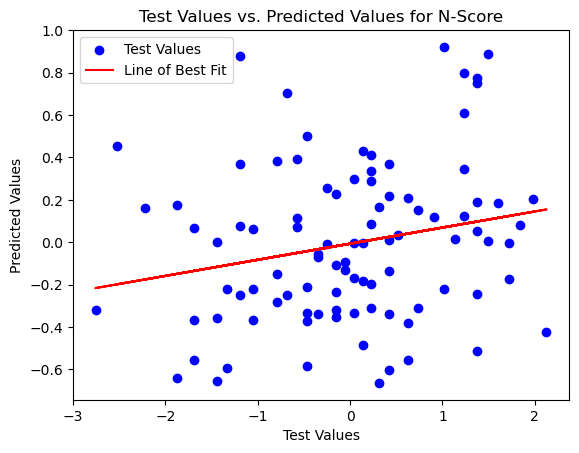

In [40]:
slope, intercept = np.polyfit(y1_test, y1_pred, 1)
def line1(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y1_test, y1_pred, color="blue", label="Test Values")
ax.plot(y1_test, line1(y1_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for N-Score")
ax.legend()
plt.show()

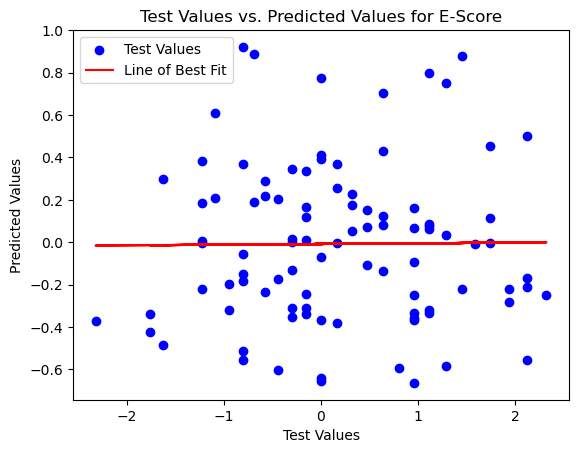

In [41]:
slope, intercept = np.polyfit(y2_test, y2_pred, 1)
def line2(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y2_test, y2_pred, color="blue", label="Test Values")
ax.plot(y2_test, line2(y2_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for E-Score")
ax.legend()
plt.show()

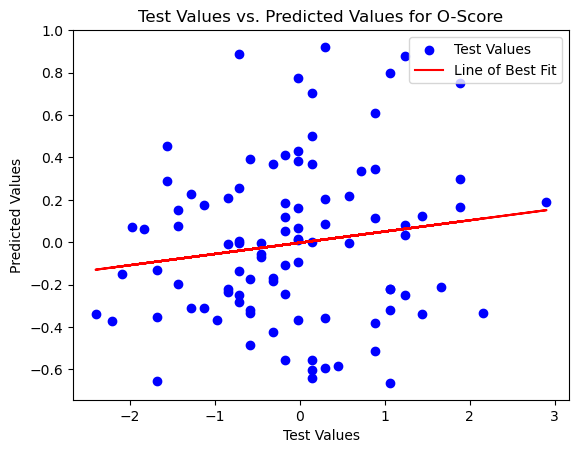

In [42]:
slope, intercept = np.polyfit(y3_test, y3_pred, 1)
def line3(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y3_test, y3_pred, color="blue", label="Test Values")
ax.plot(y3_test, line3(y3_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for O-Score")
ax.legend()
plt.show()

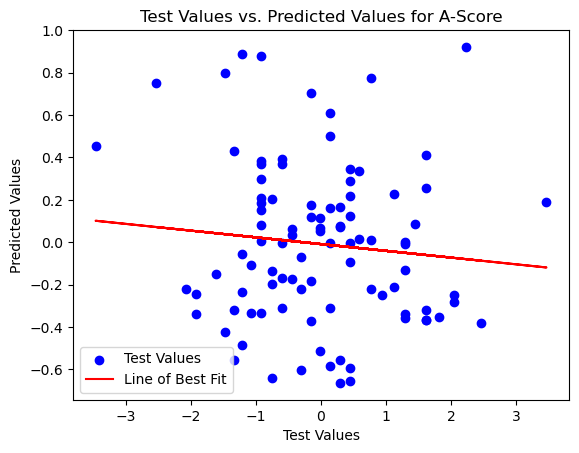

In [43]:
slope, intercept = np.polyfit(y4_test, y4_pred, 1)
def line4(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y4_test, y4_pred, color="blue", label="Test Values")
ax.plot(y4_test, line4(y4_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for A-Score")
ax.legend()
plt.show()

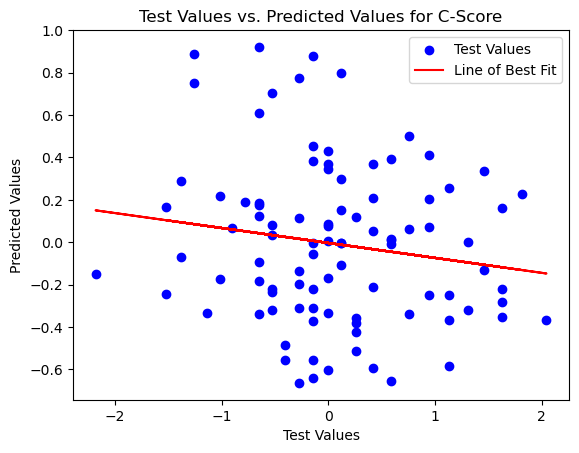

In [44]:
slope, intercept = np.polyfit(y5_test, y5_pred, 1)
def line5(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y5_test, y5_pred, color="blue", label="Test Values")
ax.plot(y5_test, line5(y5_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for C-Score")
ax.legend()
plt.show()

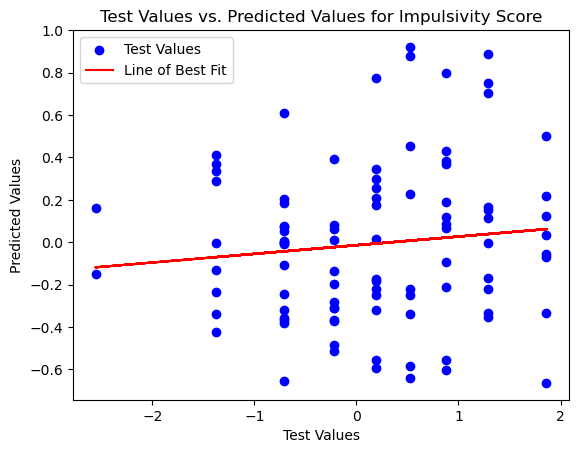

In [45]:
slope, intercept = np.polyfit(y6_test, y6_pred, 1)
def line6(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y6_test, y6_pred, color="blue", label="Test Values")
ax.plot(y6_test, line6(y6_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for Impulsivity Score")
ax.legend()
plt.show()

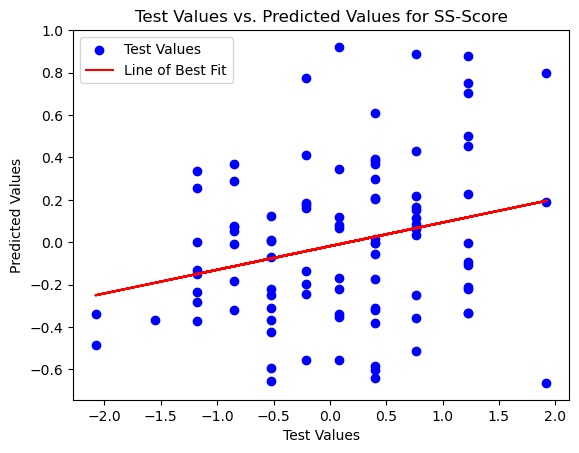

In [46]:
slope, intercept = np.polyfit(y7_test, y7_pred, 1)
def line7(x):
  return slope * x + intercept

fig, ax = plt.subplots()
ax.scatter(y7_test, y7_pred, color="blue", label="Test Values")
ax.plot(y7_test, line7(y7_test), color="red", label="Line of Best Fit")
ax.set_xlabel("Test Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Test Values vs. Predicted Values for SS-Score")
ax.legend()
plt.show()

# Conclusion

    Now taking into account the RMSE values as well as being able to compare the test values and predicted values visually
    by looking at a scatterplot along with a line of best fit for each of the graphs. It's easier to interpret the RMSE
    results on each scale. Looking at thest results, while a lot of the correlation isn't stronge, the weakest model
    appears to be the model for the E-Score which aims to predict extraversion. I beleive this model performed the worst
    out of all the models because extraversion, or in other words a person's sociability, is often difficult to change
    permanently. While it's known that certain substances can make it easier for people to socialize more confidently or
    feel less anxious in a social setting, those effects are far from permanent.
    
    In addition, the model predictions for A-Score (Agreeableness) and C-Score (Conscienciousness) appear to be negatively 
    correlated to the actual results. Meaning that the model predicted a person would be more agreeable based on their
    prior drug use when in reality they might not be so agreeable. The same goes for conscienciousness.
    
    We make the conclusion that while these models may be able to get a basis for the psychological affects of drugs use 
    and demographic status on a person's brain, obviously there are millions of other factors that could contributed to 
    a person's personality and should be investigated further in how it all takes place together.

# Assumptions:

    Independence - Observations are independent of each other and independent of repetitive measurement

    Linearity - There is a linear relationship between continuous predictor variables and the outcome variable, and 
    between continuous predictor variables and the logit of the outcome variable

    Multicollinearity - There is no multicollinearity, which occurs when two or more explanatory variables are highly 
    correlated to each other

    Outliers - There are no strongly influential outliers

    Sample size - The sample size is sufficiently large

    Outcome type - The dependent/response variable is binary or dichotomous, meaning it can only take on two possible 
    outcomes

# Limitations:

    We were very limited by the data that was aquired. The data itself was very useful but because this was an individual
    survey/questionaire it's difficult to look for extra data to suppliment our first dataset if we wanted to look for 
    more trends. We were also limited by the type of variables. All the predicting variables we used were 

# Challenges:

    One main challenge would be the fact that there would be multiple target variables to look at and deciding whether a 
    single model is optimal or splitting the targets into different models for optimization of each attribute. It’s 
    possible that both methods can be attempted depending on time and resources.

# Future Uses/Additional Applications:

    Future uses and applications at this point would be to be able to guess exactly how specific drugs would affect a 
    persons personality based on how recent they used. Further research can also be completed if more data was collected 
    on how LONG each drug was used by each individual. Possibilities for a time series anlaysis on the affects of specific 
    drugs on a person's personality could be completed this way. Recomendations for this project is to see if there is a 
    way to aquire more data and possibly more data on how long each drug was used in addition to when the last time the 
    drug was used for each individual.

# Ethical Assessment

    As always the main ethical concern for our research projects is the safety and privacy of individuals whose information 
    is included in the data. For the data set chosen, individual names are kept anonymous. The only identifying 
    characteristics for each individual are level of education, age, gender, country of residence, and ethnicity. Something 
    else to consider is what the results could be used for. For example, we can find that one individual or a handful 
    of individuals didn’t seem to experience any negative effects of heavy drug use. Someone reading those results could 
    then conclude that it is safe to use the drugs, thus spreading misinformation on a very serious topic that can cost 
    people their lives. This is a huge ethical concern as well.

# References

Gateway Foundation. (2024, April 15). 10 ways substance addiction can change your personality. https://www.gatewayfoundation.org/addiction-blog/substance-addiction-change-personality/#:~:text=Some%20personality%20changes%20are%20specific,awareness%20and%20coordination%2C%20or%20agitation. 

Khadija. (2021, September 26). Drug Consumptions (UCI). Kaggle. https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci 

Drug fact sheets. DEA. (n.d.). https://www.dea.gov/factsheets 

# Appendix


Table 1: Original Dataframe

In [47]:
drugdata

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4


Table 2: Dummy Variable transformation

In [48]:
dummy_vars

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_F,Gender_M,Education_Doctorate degree,Education_Left school at 16 years,...,Mushrooms_CL4,Mushrooms_CL5,Mushrooms_CL6,Nicotine_CL0,Nicotine_CL1,Nicotine_CL2,Nicotine_CL3,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6
0,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1880,True,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1881,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1882,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
